## Praktikum 3

### Pembuatan Dataset Sintetis

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

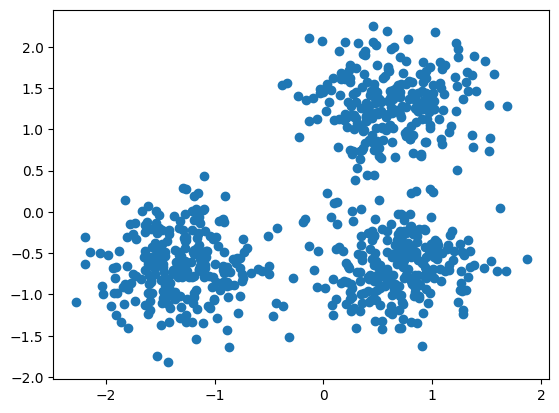

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Compute DBSCAN

In [13]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


### Evaluasi Kualitas Klasterisasi

In [17]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


### Visualisasi Hasil Klasterisasi

Estimated number of clusters: 3


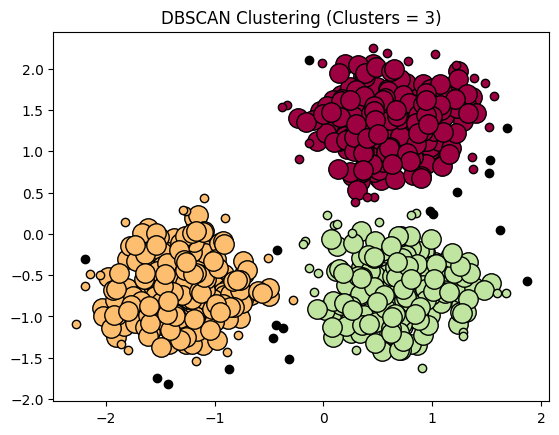

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Create mask untuk core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)

# Generate warna
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Titik core (besar)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Titik border (kecil)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# Hitung jumlah klaster
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters_}")

plt.title(f"DBSCAN Clustering (Clusters = {n_clusters_})")
plt.show()
